In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread('.\imgkohli.jpg')

In [14]:
img.shape

(654, 524, 3)

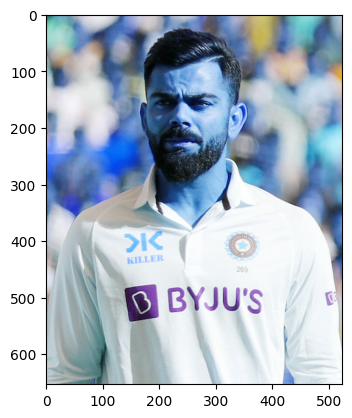

In [15]:
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [16]:
haar_data = cv2.CascadeClassifier('data.xml')
haar_data.detectMultiScale(img)

array([[159,  95, 161, 161],
       [315, 400,  65,  65],
       [ 85, 484,  59,  59]])

In [17]:
while True:
    faces = haar_data.detectMultiScale(img)
    for x, y, w, h in faces:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 4)
    cv2.imshow('result', img)
    if cv2.waitKey(2)==27:
        break
cv2.destroyAllWindows()

In [21]:
capture = cv2.VideoCapture(0)
data = []
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x, y, w, h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 4)
            face= img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50, 50))
#             print(len(data))
            if len(data)< 200 :
                data.append(face)
        cv2.imshow('result', img)
        if cv2.waitKey(2)==27 or len(data)>=200:
            break
capture.release()
cv2.destroyAllWindows()

In [20]:
np.save('without_mask.npy', data)

In [10]:
np.save('with_mask.npy', data)

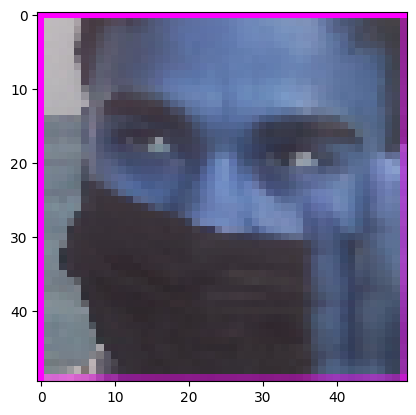

In [11]:
plt.imshow(data[0])